In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt 
import datetime
from sklearn.metrics import fbeta_score,roc_auc_score
#from mochi import f_beta_01

In [2]:
from sklearn.ensemble import RandomForestClassifier as RFC #sklearn 0.19

In [3]:
class Config:
    pass
config = pd.read_pickle('config.pkl')
data_path = config.data_path
feature_path = config.feature_path
#print(dir(config))
print('Currently has feature-sets')
print(config.feature_dict.keys())

Currently has feature-sets
dict_keys(['trade_and_recent_login_comparing', 'recent_login_detail', 'trade_detail_feature', 'login_trade_hist_stats', 'llc_user_habbit', 'hcc_user_habbit', 'hcc_properties', 'hcc_target_encoding', 'login_detail_new_features', 'hcc_mult_target_encoding', 'hcc_user_trade_habbit', 'hcc_trade_properties'])


In [4]:
features =   (config.feature_dict['trade_detail_feature']+
              config.feature_dict['recent_login_detail']+
              config.feature_dict['trade_and_recent_login_comparing']+
              config.feature_dict['login_trade_hist_stats']+
              config.feature_dict['llc_user_habbit']+
             config.feature_dict['hcc_user_habbit']+
              config.feature_dict['hcc_properties']+
            config.feature_dict['hcc_target_encoding']+
                    config.feature_dict['login_detail_new_features']+
              config.feature_dict['hcc_trade_properties']+
              config.feature_dict['hcc_mult_target_encoding']+
              config.feature_dict['hcc_user_trade_habbit']
             )
feature_sequence_list = []
for feature in features:
    feature_sequence_list.append(pd.read_pickle(feature_path+feature+'.pkl').reshape(-1,1))
    
trade_tt_mat = np.hstack(feature_sequence_list)
#trade_tt_mat[trade_tt_mat==-10]=np.nan

validation_tuple_list = config.single_module_validation_indice_set
train_labels = pd.read_pickle(data_path+'trade_train_label.pkl')

In [22]:
remaining_features = list(features)
result_list = []

while len(remaining_features) > 0.2*len(features):
    
    print('running with %d features' % len(remaining_features))
    result_unit_dict = {}
    
    #initiating the validation set
    remaining_features_ori_index = [features.index(x) for x in remaining_features]
    remainging_trade_tt_mat = trade_tt_mat[:,remaining_features_ori_index]
    
    #initialize the results
    feature_importance = np.zeros(len(remaining_features))
    fbetas = []
    auc_results = []
    
    for train_indice,val_indice in validation_tuple_list:
        
        #filter the validation values
        dev_X, val_X = remainging_trade_tt_mat[train_indice], remainging_trade_tt_mat[val_indice]
        dev_y, val_y = train_labels.iloc[train_indice].values, train_labels.iloc[val_indice].values
    
        classifier = RFC(500,class_weight='balanced',random_state =33,n_jobs = 6)
        classifier.fit(dev_X,dev_y)
        
        feature_importance += classifier.feature_importances_
        
        preds = classifier.predict(val_X)
            
        fbetas.append(fbeta_score(val_y, preds > 0.5, 0.1)) 
    
        auc_results.append(roc_auc_score(val_y,preds))
        
        print('turn passed')
        
    #appending the current result
    result_unit_dict['feature_count'] = len(remaining_features)
    result_unit_dict['used_features'] = remaining_features
    result_unit_dict['fbeta'] = np.mean(fbetas)
    result_unit_dict['auc'] = np.mean(auc_results)
    result_unit_dict['feature_count'] = len(remaining_features)
    result_unit_dict['used_features'] = remaining_features
    result_list.append(result_unit_dict)
    
    print('fbeta is %f'% result_unit_dict['fbeta'])
    print('auc is %f'% result_unit_dict['auc'])
    
    #choosing the remaining features
    sorted_feature_importacne = sorted(zip(remaining_features,feature_importance),key = lambda x : x[1],reverse = True)
    remaining_count = len(remaining_features)*0.95
    
    remaining_features = [x[0] for x in sorted_feature_importacne][:int(remaining_count)]


running with 446 features
turn passed
turn passed
turn passed
turn passed
turn passed
turn passed
fbeta is 0.948240
auc is 0.780718
running with 423 features
turn passed
turn passed
turn passed
turn passed
turn passed
turn passed
fbeta is 0.949461
auc is 0.784936
running with 401 features
turn passed
turn passed
turn passed
turn passed
turn passed
turn passed
fbeta is 0.946748
auc is 0.784589
running with 380 features
turn passed
turn passed
turn passed
turn passed
turn passed
turn passed
fbeta is 0.950286
auc is 0.784242
running with 361 features
turn passed
turn passed
turn passed
turn passed
turn passed
turn passed
fbeta is 0.951988
auc is 0.786996
running with 342 features
turn passed
turn passed
turn passed
turn passed
turn passed
turn passed
fbeta is 0.950004
auc is 0.783520
running with 324 features
turn passed
turn passed
turn passed
turn passed
turn passed
turn passed
fbeta is 0.946638
auc is 0.788050
running with 307 features
turn passed
turn passed
turn passed
turn passed
tu

In [23]:
result_df = pd.DataFrame(result_list)

In [24]:
result_df

,auc,fbeta,feature_count,used_features
0,0.780718,0.948240,446,"[day, weekday, hour, day_cycle, weekday_cycle,..."
1,0.784936,0.949461,423,"[id_t_encoding, ip_t_encoding, device_id_city_..."
2,0.784589,0.946748,401,"[ip_t_encoding, id_t_encoding, ip_id_t_encodin..."
3,0.784242,0.950286,380,"[id_t_encoding, city_id_t_encoding, ip_t_encod..."
4,0.786996,0.951988,361,"[id_t_encoding, ip_t_encoding, city_id_t_encod..."
5,0.783520,0.950004,342,"[id_t_encoding, city_id_t_encoding, device_id_..."
6,0.788050,0.946638,324,"[id_t_encoding, ip_t_encoding, city_id_t_encod..."
7,0.787395,0.946739,307,"[ip_t_encoding, id_t_encoding, city_id_t_encod..."
8,0.786594,0.943298,291,"[ip_t_encoding, city_id_t_encoding, id_t_encod..."
9,0.785433,0.942587,276,"[ip_t_encoding, id_t_encoding, device_id_t_enc..."


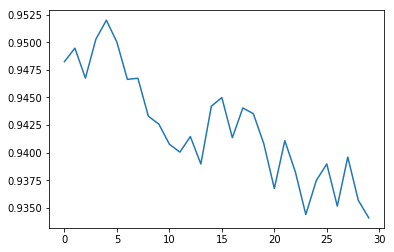

In [28]:
%matplotlib inline
plt.plot(result_df.index,result_df['fbeta'])

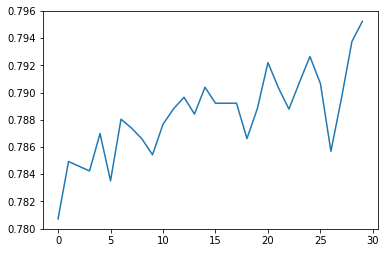

In [29]:
%matplotlib inline
plt.plot(result_df.index,result_df['auc'])

In [18]:
result_feature = result_df.loc[result_df['feature_count']==361,'used_features'].iloc[0]